<a href="https://colab.research.google.com/github/50UM3N/digital-image-processing/blob/main/CV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import copy
import math
L = 256

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


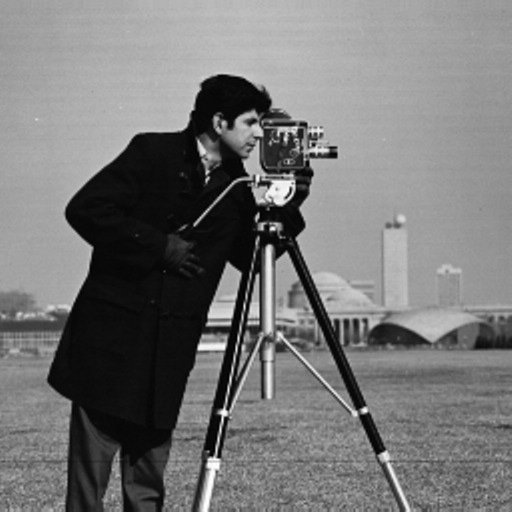

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CV/7.png')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImg)

## Two matrices are given one is a bigger (W) another square of size 3X3 (K). Now we have to implement the following operations to get the resultant matrix R.

In [ ]:
# kernel
def matMul(mat, kernel):
  mat = mat.flatten()
  kernel = kernel.flatten()
  sum = 0
  for i in range(len(mat)):
    sum+=mat[i]*kernel[i]
  return sum

def effect(image, kernel):
  K_SHAPE=kernel.shape[0]
  K_2SHAPE = math.floor(K_SHAPE/2)
  [x,y] = image.shape
  newImg = copy.deepcopy(grayImg)
  image = image.astype(int)
  for i in range(K_2SHAPE,x-K_2SHAPE):
    for j in range(K_2SHAPE,y-K_2SHAPE):
      cutMat = image[i-K_2SHAPE:i+K_2SHAPE+1,j-K_2SHAPE:j+K_2SHAPE+1]
      val = round(matMul(cutMat,kernel))
      if val>255: val=255
      if val<0: val=0
      newImg[i,j] = val
  return newImg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


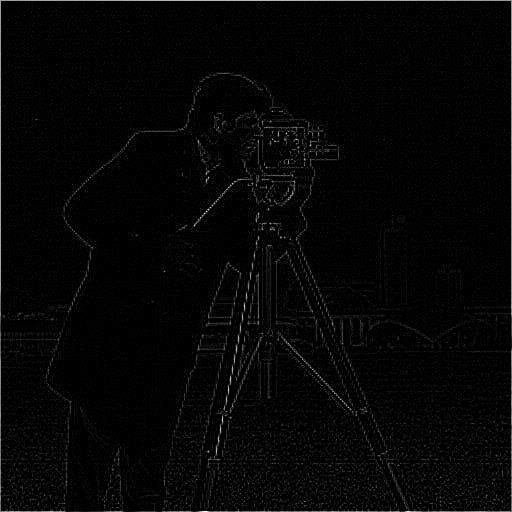

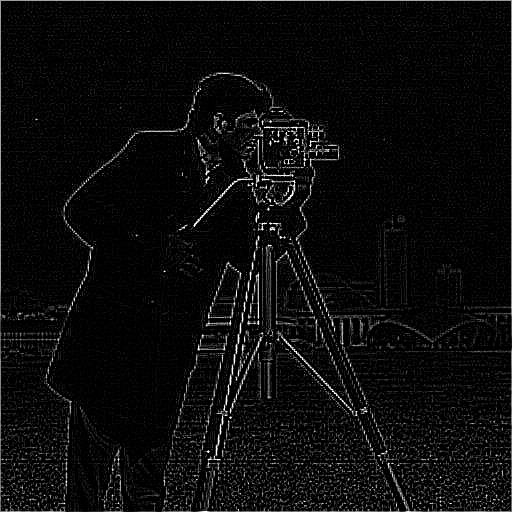

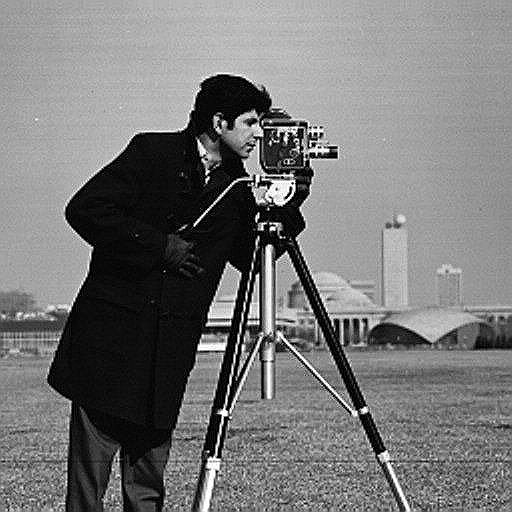

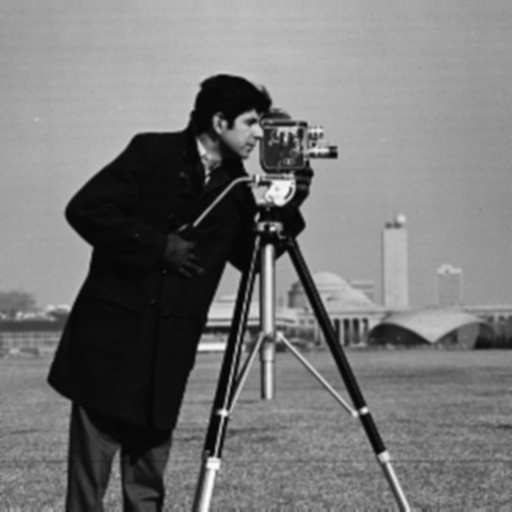

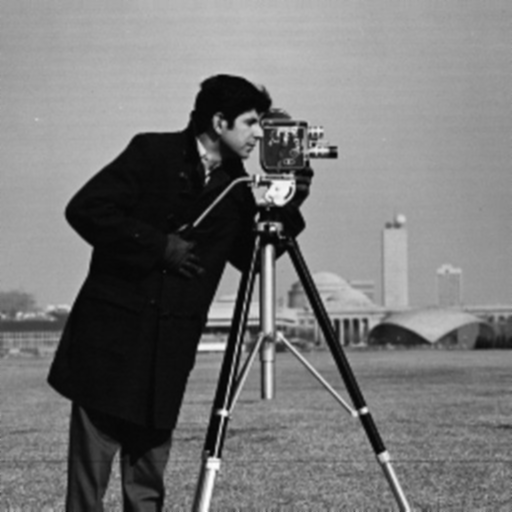

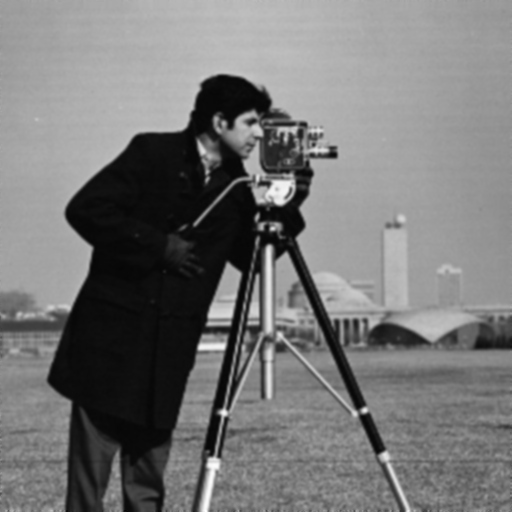

In [ ]:
# edge 
f1 = np.array([[0,-1,0],
      [-1,4,-1],
      [0,-1,0]])
# edge
f2 = np.array([[-1,-1,-1],
      [-1,8,-1],
      [-1,-1,-1]])
# sharpe
f3 = np.array([[0,-1,0],
      [-1,5,-1],
      [0,-1,0]])
# blur box
f4 = np.array([[1/9,1/9,1/9],
               [1/9,1/9,1/9],
               [1/9,1/9,1/9]])
# gaussian blur 3*3
f5 = np.array([[0.0625,0.125,0.0625],
      [0.125,0.25,0.125],
      [0.0625,0.125,0.0625]])
# gaussian blur 5*5
f6 = np.array([[1/256,4/256,6/256,4/256,1/256],
               [4/256,16/256,24/256,16/256,4/256],
               [6/256,24/256,36/256,24/256,6/256],
               [4/256,16/256,24/256,16/256,4/256],
               [1/256,4/256,6/256,4/256,1/256]])

kernels = np.array([f1,f2,f3,f4,f5,f6])
for i in range(kernels.shape[0]):
  kernel = kernels[i]
  newImage = effect(grayImg,kernel)
  cv2_imshow(newImage)

## Implement Histogram equalization for any given image

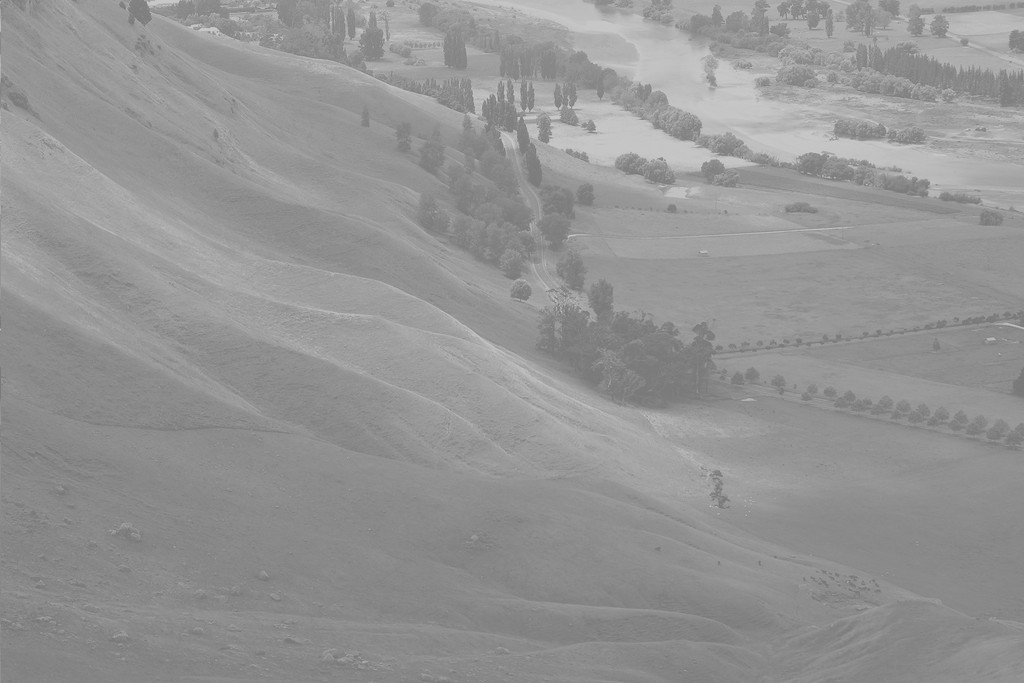

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CV/5.jpg')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImg)

In [ ]:
def frqHist(image):
  [x,y] = image.shape
  # creating the histogram of the intensity value
  grayHist = np.zeros(L)
  for i in range(x):
    for j in range(y):
      val = image[i,j]
      grayHist[val]+= 1
  return grayHist

def histEq(image):
  grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  [x,y] = grayImage.shape

  grayHist=frqHist(grayImage)
  # normalize the histrogram
  normHist = np.zeros(L)
  total = x*y
  sum = 0
  for i in range(L):
    # sum = 0
    # for j in range(i+1):
    sum+=grayHist[i]/total
    normHist[i] = round((L-1)*sum)

  # after normalization remaping the image with the histrogram
  normImage = copy.deepcopy(grayImage)
  [x,y] = grayImg.shape
  for i in range(x):
      for j in range(y):
          val = grayImage[i,j]
          normImage[i,j]= normHist[val]
  return [grayHist, frqHist(normImage),grayImage, normImage]

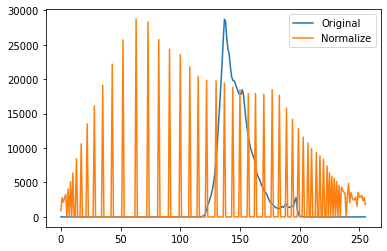

In [ ]:
[hist, normHist, grayImage, normImage] = histEq(img)

# ploting in graph
plt.plot(hist,label="Original")
plt.plot(normHist, label="Normalize")
plt.legend()
plt.show()

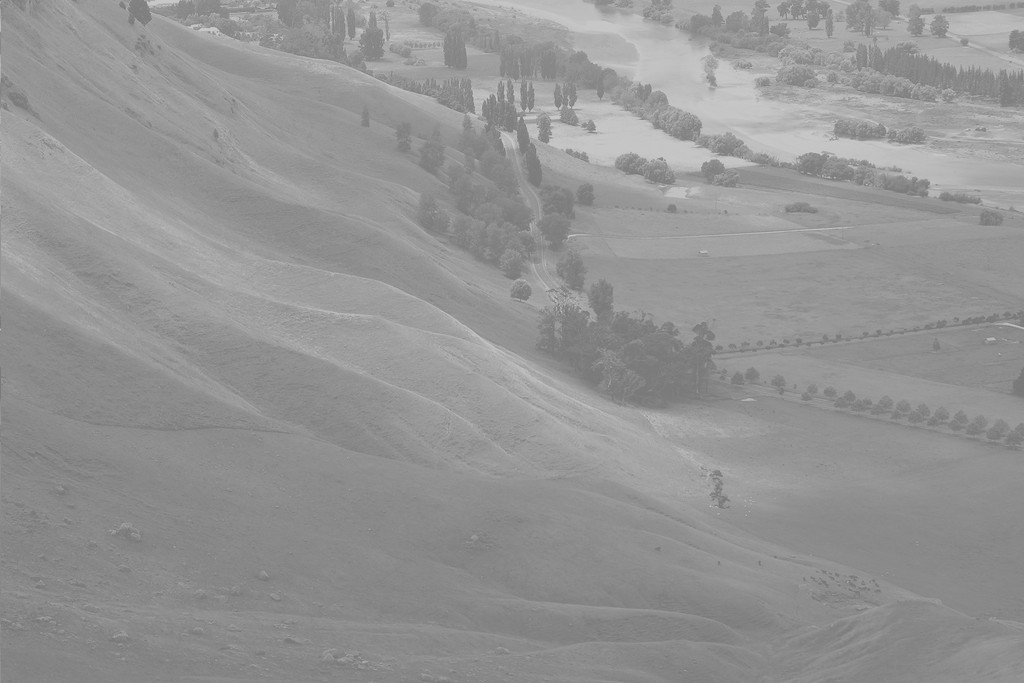

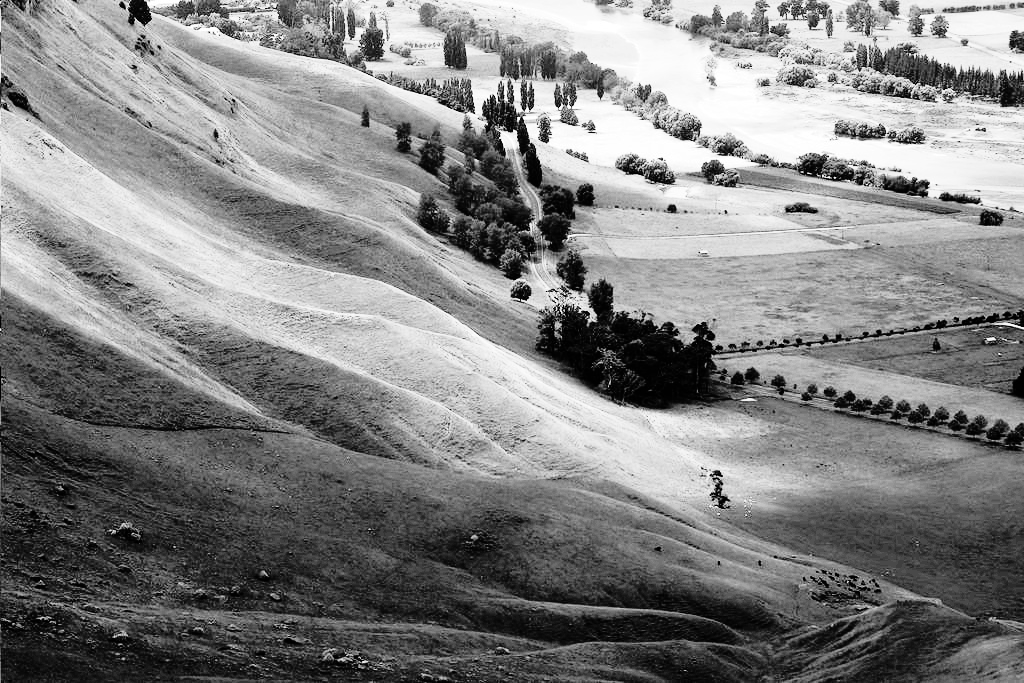

In [ ]:
cv2_imshow(grayImage)
cv2_imshow(normImage)